In [1]:
import pandas as pd

In [10]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [4]:
boston_data = pd.read_excel(r'C:\Users\Yogen\Documents\1. MBA\Outlook Internship\Tree Making.xlsx')

In [5]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


### Cat. MEDV

We must determine which values of MEDV are classified as which Category

In [6]:
from sklearn import neighbors

In [8]:
knn = neighbors.KNeighborsClassifier()

In [11]:
knn.fit(np.array(boston_data['MEDV']).reshape(-1,1), boston_data['CAT. MEDV'])

KNeighborsClassifier()

In [19]:
boston_data.groupby(['CAT. MEDV']).count() #two categories

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CAT. MEDV,,,,,,,,,,,,,,
0,422,422,422,422,422,422,422,422,422,422,422,422,422,422
1,84,84,84,84,84,84,84,84,84,84,84,84,84,84


In [20]:
max(boston_data['MEDV']) #we'll see the classification until the max value of MEDV

50.0

In [21]:
results = [] #predictions of classifier for all values of MEDV
for i in range(50):
    results.append(knn.predict(np.array(i).reshape(1,-1)))

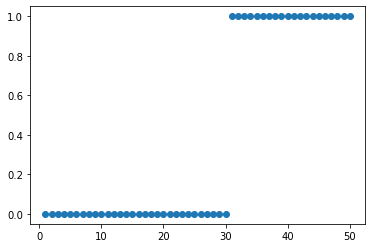

In [22]:
plt.scatter(range(1,51),results) #split at value of 30 

### Decision Tree

In [31]:
from sklearn import tree
from sklearn import model_selection
from sklearn import preprocessing

In [43]:
tree_clf = tree.DecisionTreeClassifier()

In [28]:
x = boston_data.drop(['MEDV', 'CAT. MEDV'], axis=1)

In [48]:
y = boston_data['CAT. MEDV']

We need to encode out labels as the decision tree algorithm expects categorical values.

In [32]:
lab_enc = preprocessing.LabelEncoder()

In [39]:
x = x.apply(lab_enc.fit_transform)

In [40]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,3,19,0,51,320,172,297,0,34,9,356,53
1,23,0,56,0,36,279,225,333,1,11,23,356,161
2,22,0,56,0,36,400,159,333,1,11,23,271,28
3,32,0,16,0,33,383,112,361,2,5,31,311,6
4,110,0,16,0,33,395,139,361,2,5,31,356,64


In [42]:
y = lab_enc.fit_transform(y)

###### Fitting model

In [49]:
tree_clf.fit(x,y)

DecisionTreeClassifier()

[Text(195.51796875, 206.56799999999998, 'X[5] <= 374.5\ngini = 0.277\nsamples = 506\nvalue = [422, 84]'),
 Text(98.0859375, 184.824, 'X[12] <= 55.0\ngini = 0.089\nsamples = 430\nvalue = [410, 20]'),
 Text(52.3125, 163.07999999999998, 'X[5] <= 337.5\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(31.387500000000003, 141.336, 'X[12] <= 33.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(20.925, 119.592, 'X[7] <= 367.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(10.4625, 97.848, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(31.387500000000003, 97.848, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(41.85, 119.592, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(73.2375, 141.336, 'X[10] <= 23.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(62.775000000000006, 119.592, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(83.7, 119.592, 'X[9] <= 39.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(73.2375, 97.848, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]

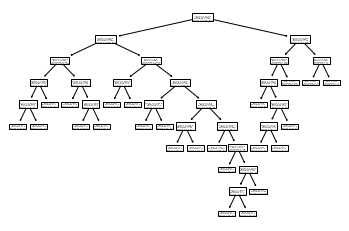

In [50]:
tree.plot_tree(tree_clf)

In [52]:
import graphviz

In [59]:
dot_data = tree.export_graphviz(tree_clf, feature_names= x.columns, out_file=None,filled=True,rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(r'C:\Users\Yogen\Documents\1. MBA\Outlook Internship\Decision Tree')

'C:\\Users\\Yogen\\Documents\\1. MBA\\Outlook Internship\\Decision Tree.pdf'